In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')
# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

           date stock  
0   6/5/20 0:00     A  
1   6/3/20 0:00     A  
2  5/26/20 0:00     A  
3  5/22/20 0:00     A  
4  5/22/20 0:00     

In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1048575 non-null  int64              
 1   headline    1048575 non-null  object             
 2   url         1048575 non-null  object             
 3   publisher   1048575 non-null  object             
 4   date        1048575 non-null  datetime64[ns, UTC]
 5   stock       1048575 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 48.0+ MB
None


In [6]:
# Summary statistics for numerical columns
print(df.describe())

# Unique publishers and stocks
print("Unique publishers:", df['publisher'].nunique())
print("Unique stocks:", df['stock'].nunique())

         Unnamed: 0
count  1.048575e+06
mean   5.270714e+05
std    3.041128e+05
min    0.000000e+00
25%    2.637275e+05
50%    5.270880e+05
75%    7.903815e+05
max    1.053772e+06
Unique publishers: 984
Unique stocks: 4590


Check the distribution of articles over time:

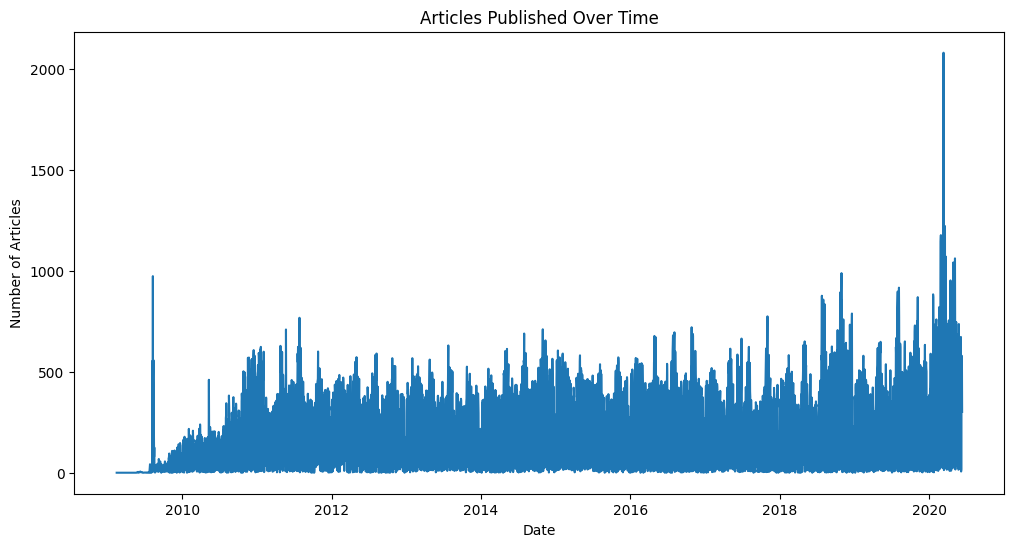

In [7]:
df['date_only'] = df['date'].dt.date  # Extract the date part
articles_per_day = df.groupby('date_only').size()

# Plot
plt.figure(figsize=(12, 6));
articles_per_day.plot(kind='line', title='Articles Published Over Time');
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

#### Publisher Analysis
##### Most frequent publishers:

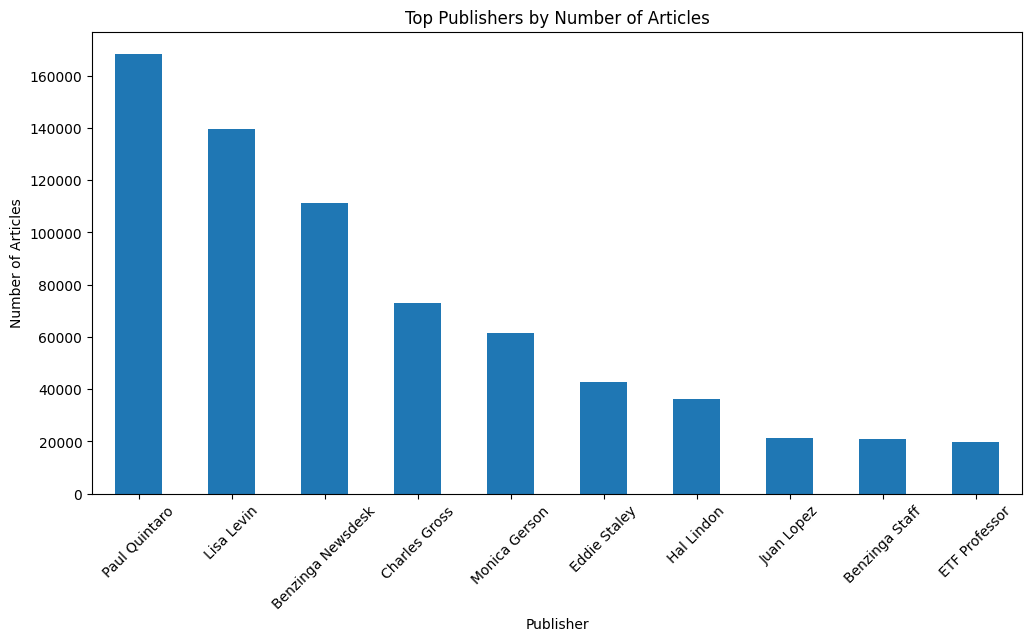

In [9]:
top_publishers = df['publisher'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', title='Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Calculate headline lengths:

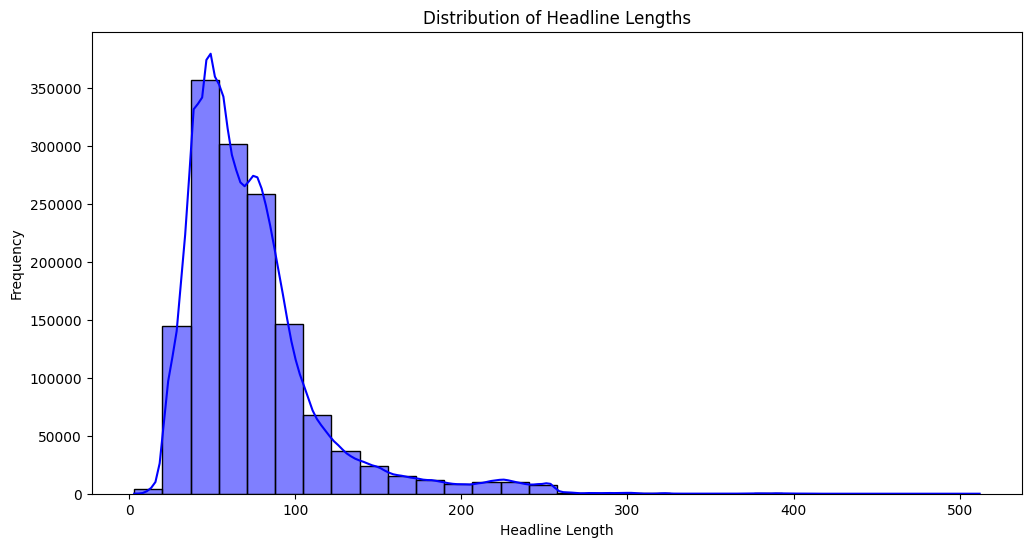

In [10]:
df['headline_length'] = df['headline'].apply(len)

# Plot headline length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Headline length statistics:")
print(df['headline_length'].describe())

Headline length statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [12]:
from textblob import TextBlob


Sentiment Analysis for Each Headline:

Headline: Stocks rally as inflation cools.
  Polarity: 0.0
  Subjectivity: 0.0
--------------------------------------------------
Headline: Tech stocks plunge amid rate hike fears.
  Polarity: 0.0
  Subjectivity: 0.0
--------------------------------------------------
Headline: Economic outlook remains uncertain.
  Polarity: 0.2
  Subjectivity: 0.2
--------------------------------------------------
Headline: The market is booming!
  Polarity: 0.0
  Subjectivity: 0.0
--------------------------------------------------
Headline: Job reports show significant gains.
  Polarity: 0.375
  Subjectivity: 0.875
--------------------------------------------------

DataFrame with Sentiment Scores:

                                   headline  polarity  subjectivity
0          Stocks rally as inflation cools.     0.000         0.000
1  Tech stocks plunge amid rate hike fears.     0.000         0.000
2       Economic outlook remains uncertain.     0.200         0.

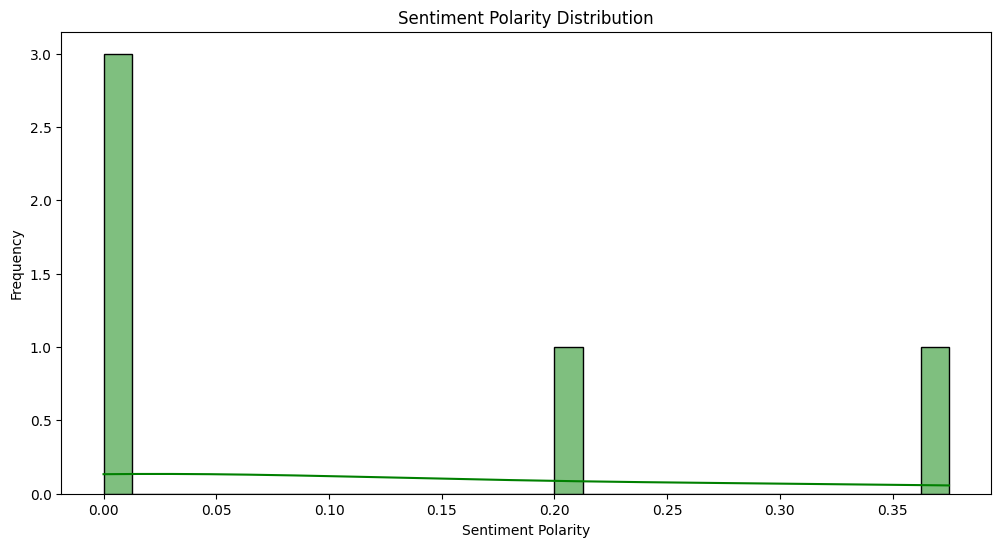

In [15]:
# Example DataFrame with financial news headlines
data = {
    'headline': [
        "Stocks rally as inflation cools.",
        "Tech stocks plunge amid rate hike fears.",
        "Economic outlook remains uncertain.",
        "The market is booming!",
        "Job reports show significant gains."
    ]
}
df = pd.DataFrame(data)

# Step 1: Analyze sentiment for each headline
print("Sentiment Analysis for Each Headline:\n")
for index, row in df.iterrows():
    headline = row['headline']
    blob = TextBlob(headline)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    print(f"Headline: {headline}")
    print(f"  Polarity: {polarity}")
    print(f"  Subjectivity: {subjectivity}")
    print("-" * 50)

# Step 2: Add sentiment scores to the DataFrame
df['polarity'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Step 3: Display the DataFrame with added sentiment scores
print("\nDataFrame with Sentiment Scores:\n")
print(df)

# Step 4: Visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['polarity'], bins=30, kde=True, color='green')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


Sentiment Distribution (%):
sentiment_category
Neutral     80.0
Positive    20.0
Name: proportion, dtype: float64


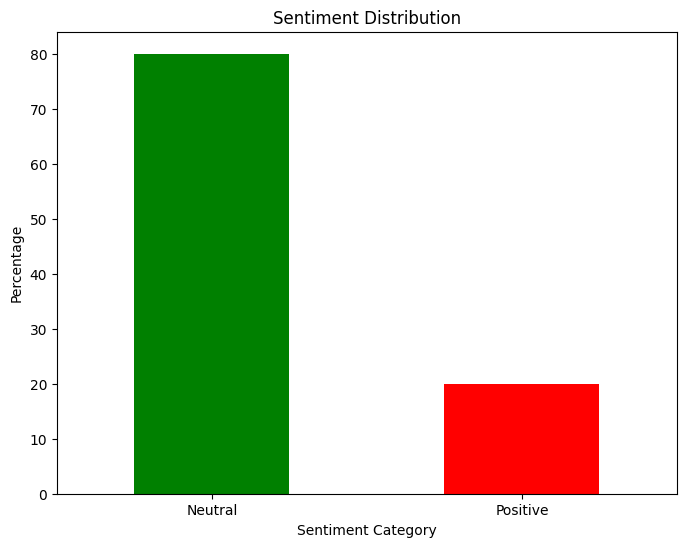

In [ ]:
df['sentiment_score'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 2: Add a polarity column using TextBlob
df['sentiment_polarity'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 3: Categorize sentiment based on polarity
def categorize_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_polarity)

# Step 4: Calculate percentage distribution of sentiment categories
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True) * 100

# Print percentage distribution
print("Sentiment Distribution (%):")
print(sentiment_distribution)

# Step 5: Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution by Polarity')
plt.ylabel('Percentage')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=0)
plt.show()

# Step 6: Visualize the polarity distribution
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment_polarity'], bins=30, color='blue', alpha=0.7)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


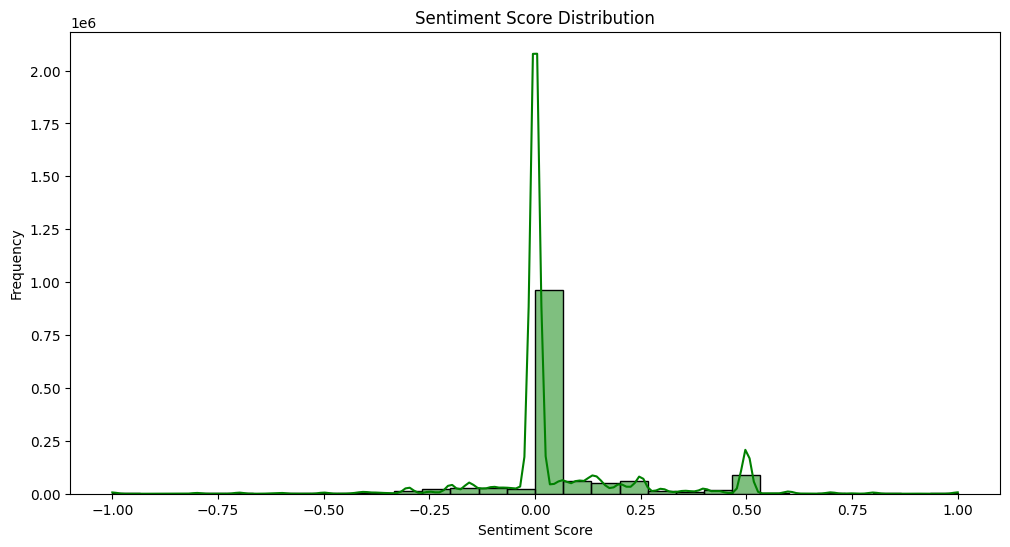

In [13]:

# Add a sentiment score column
df['sentiment_score'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='green')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()